<a href="https://colab.research.google.com/github/kessmith/NN_RealTime_Detector/blob/main/yolov5_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Feb 24 12:29:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Importing necessary Yolov5 packages ande dependencies**

In [2]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
Setup complete. Using torch 1.13.1+cu116 (Tesla T4)


# **Importing roboflow packages for dataset importing**

In [3]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")
rf = Roboflow(api_key="T2oNsglLK7hupVVcW8ds")
project = rf.workspace("thesis-dubwt").project("thesis-data-4bu5t")
dataset = project.version(3).download("yolov5")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Thesis-Data-3 in yolov5pytorch:: 100%|██████████| 444/444 [00:00<00:00, 1122.81it/s]


# **Training our dataset**
- **Parameters:** 100 Epochs, 416 image size, batches of 16

In [5]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Thesis-Data-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

# Display Training Results in Visual Format

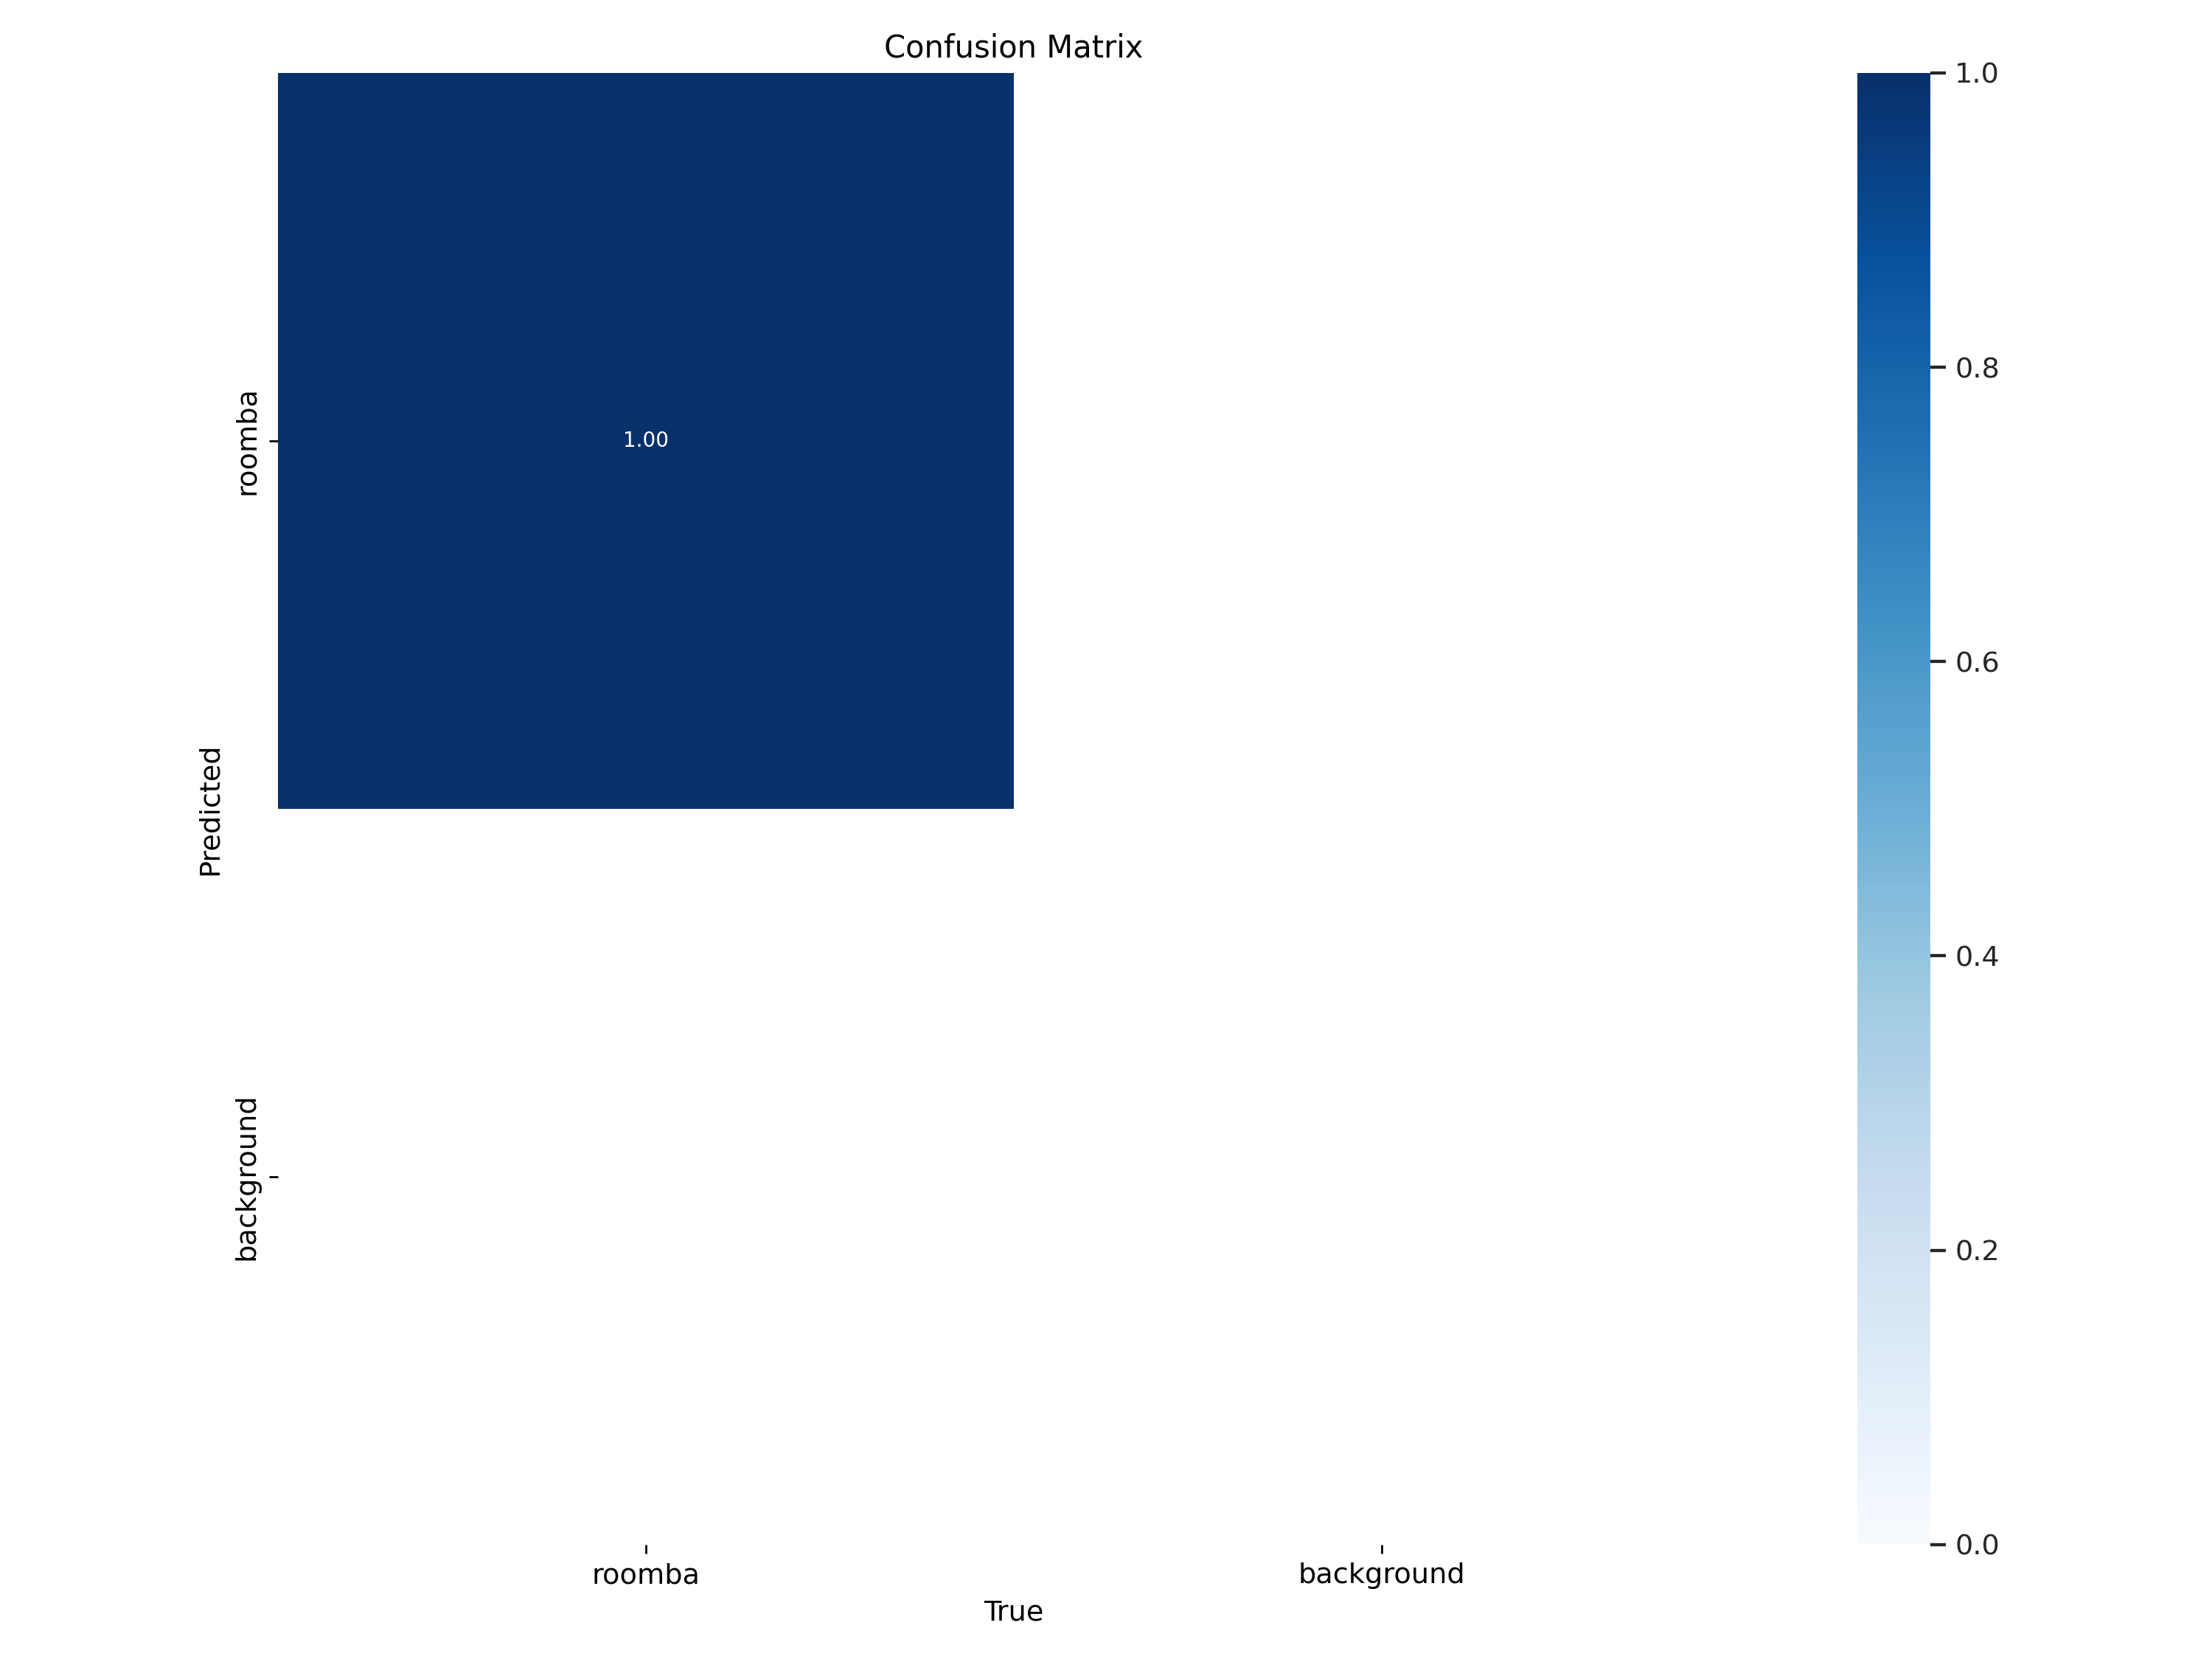

In [7]:
Image(filename=f'/content/yolov5/runs/train/exp/confusion_matrix.png', width=600)

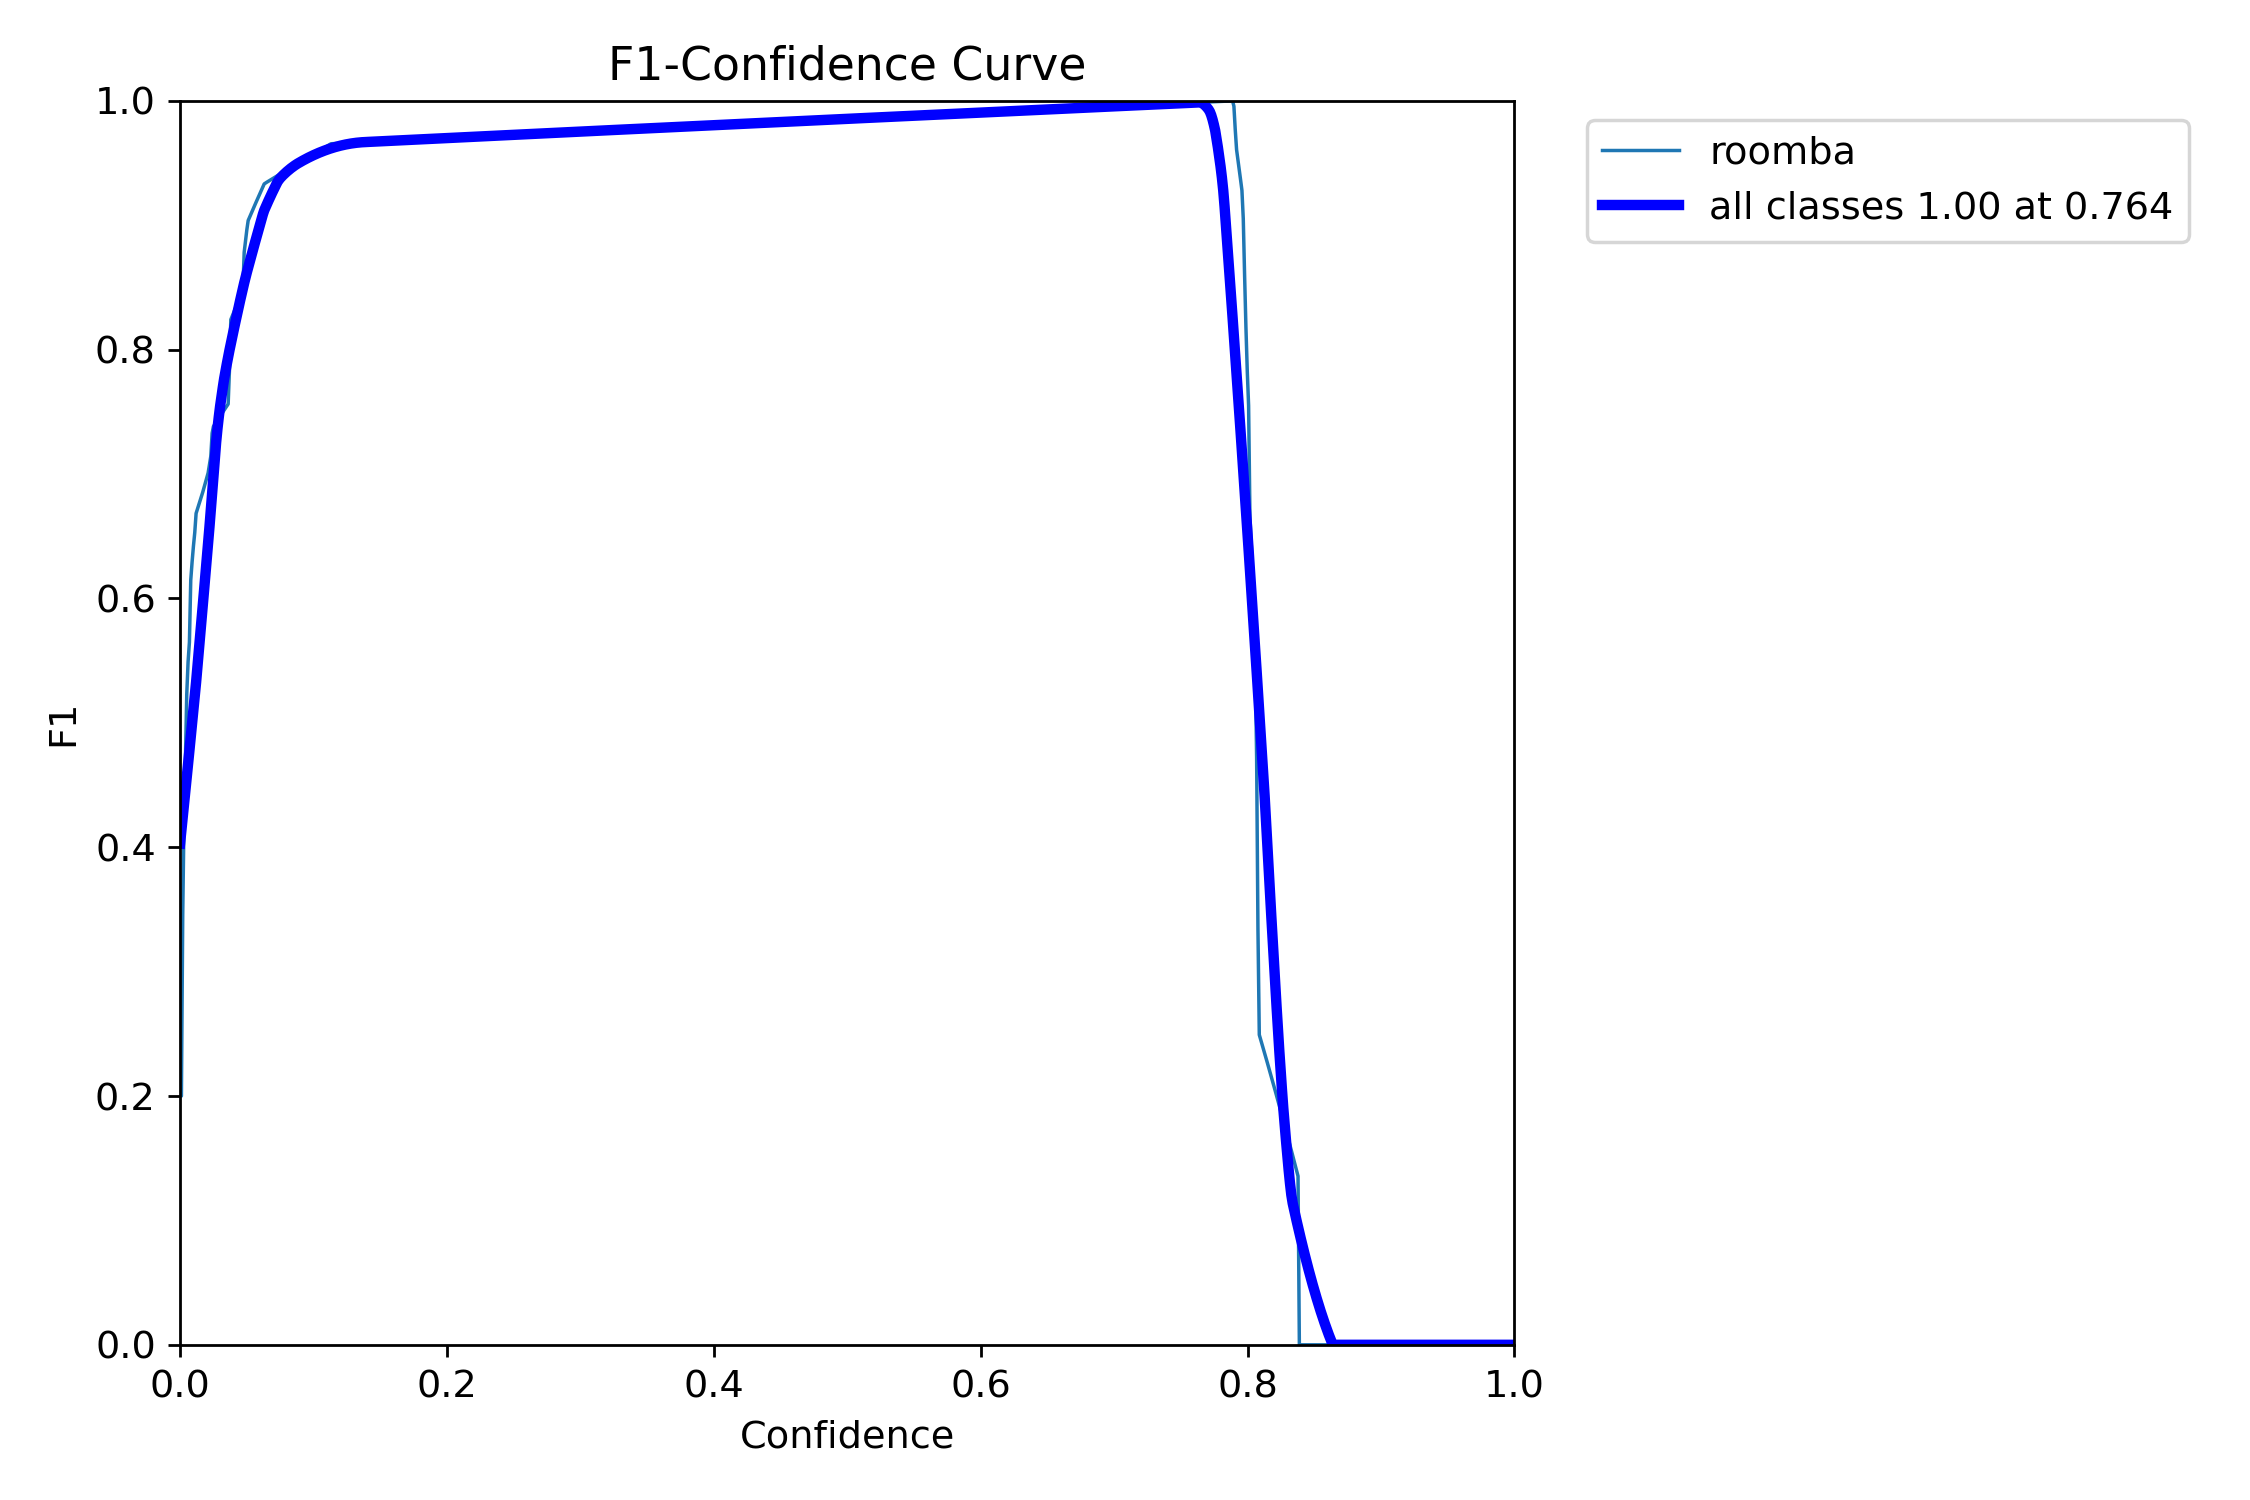

In [8]:
Image(filename=f'/content/yolov5/runs/train/exp/F1_curve.png', width=600)

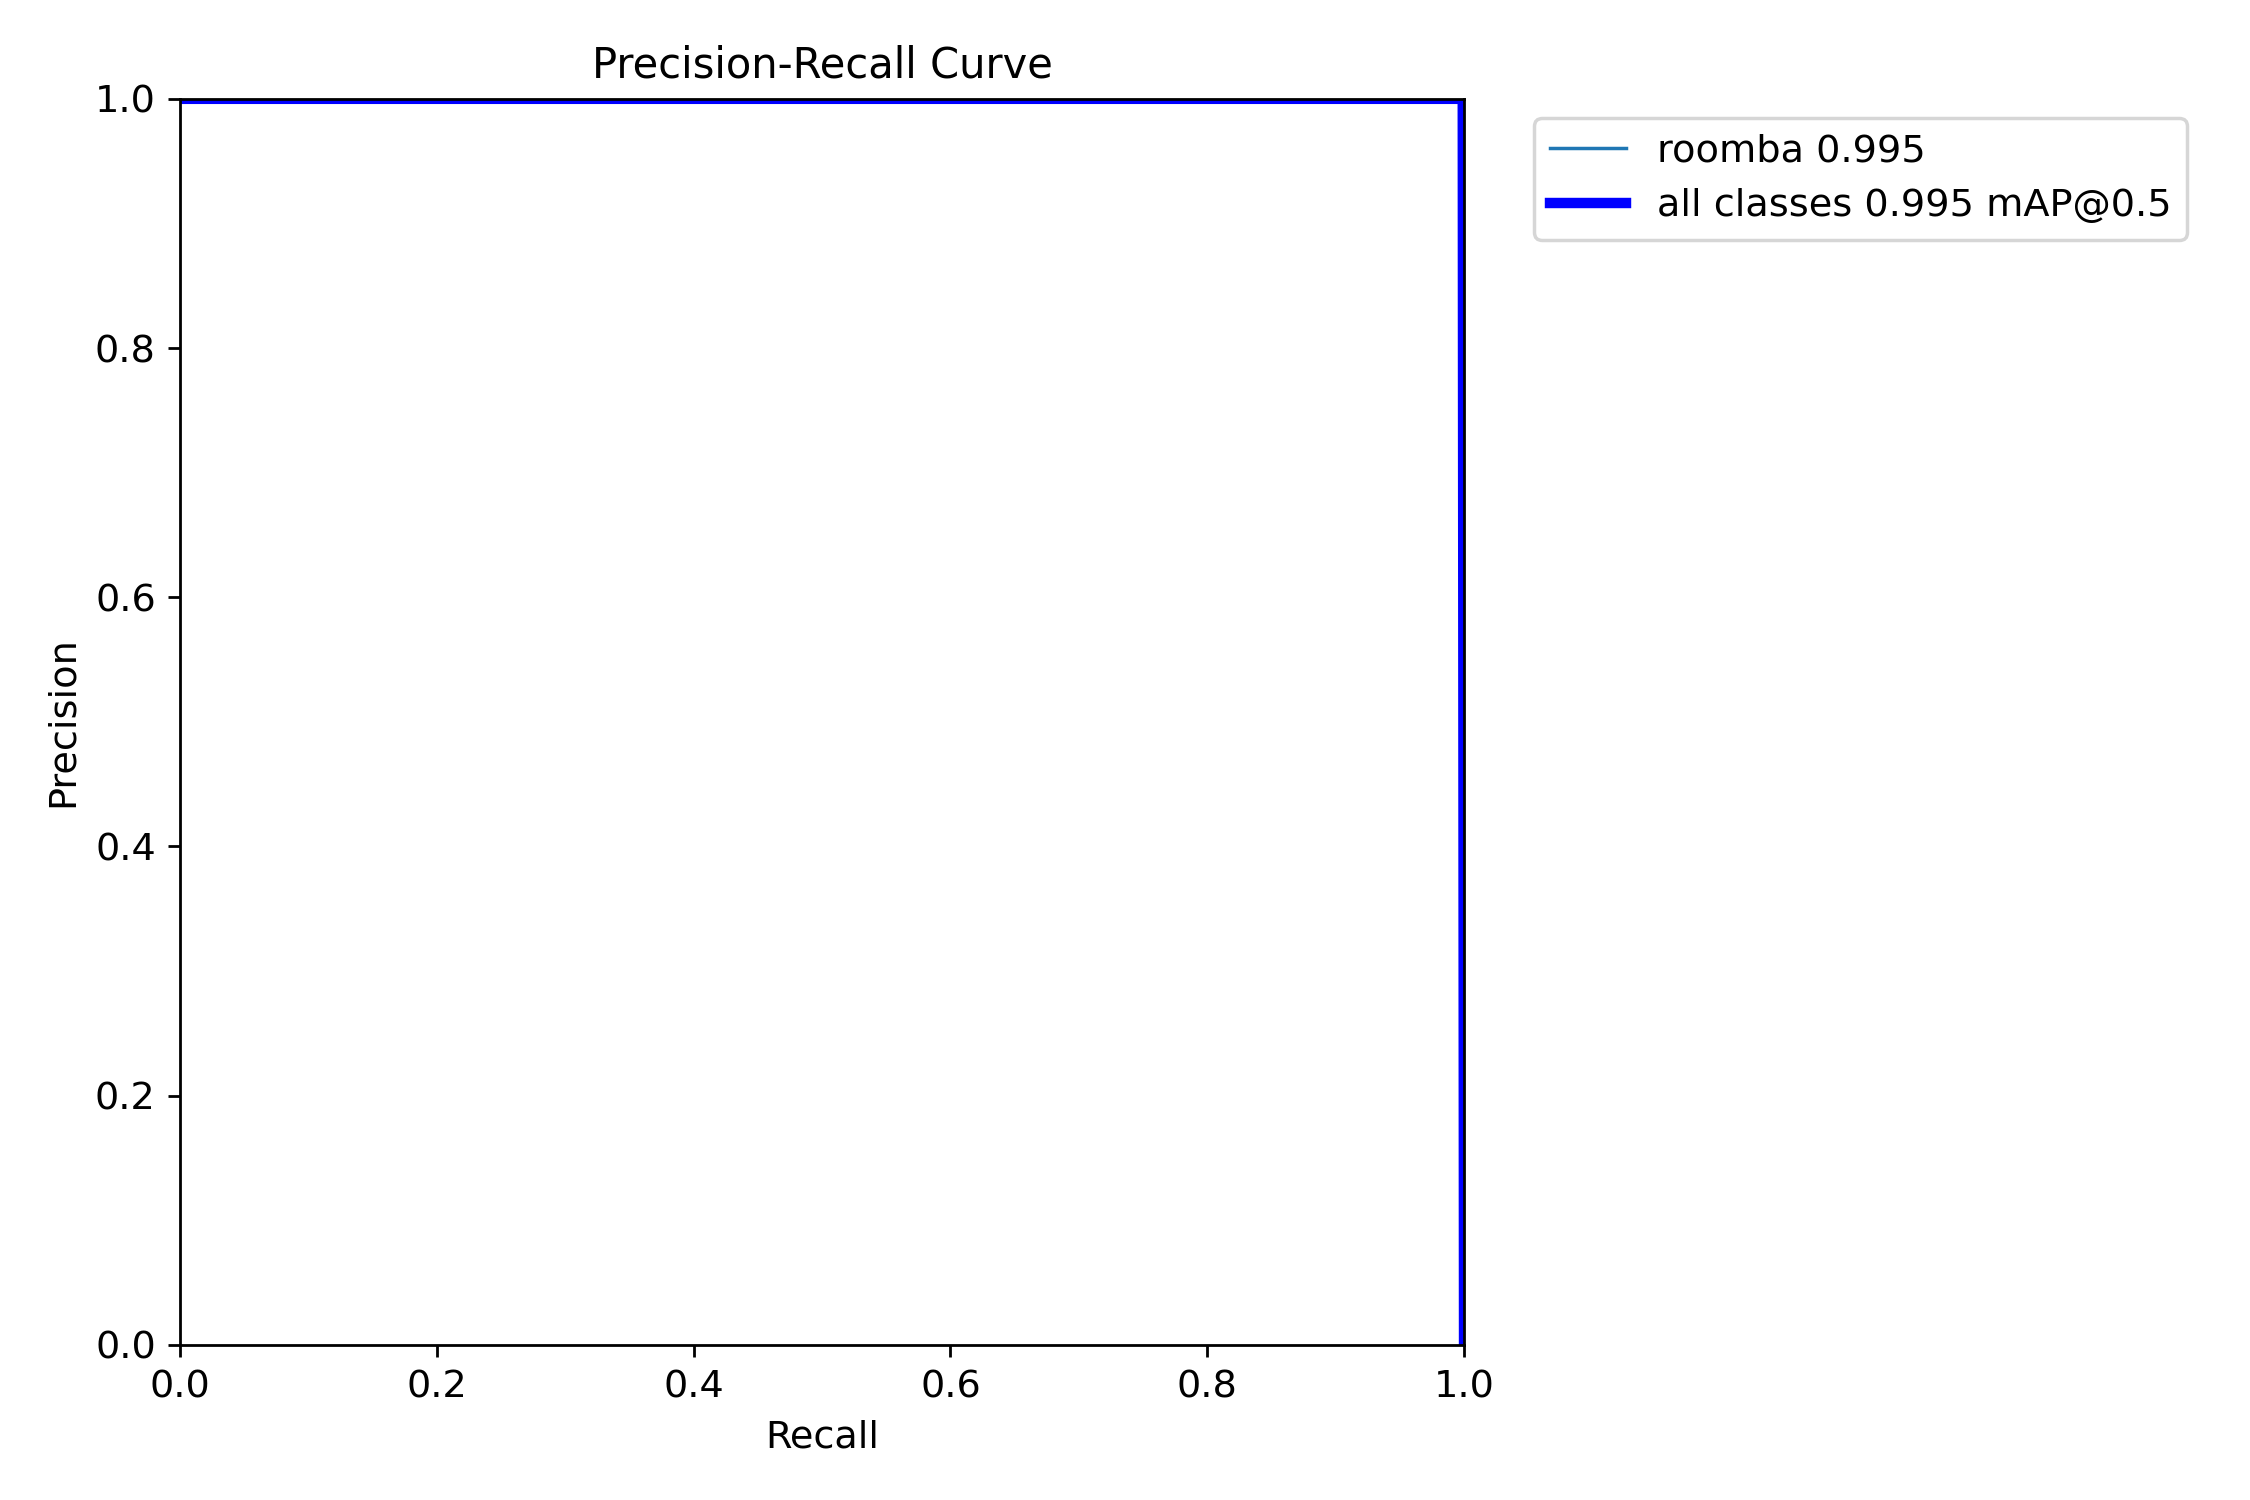

In [9]:
Image(filename=f'/content/yolov5/runs/train/exp/PR_curve.png', width=600)

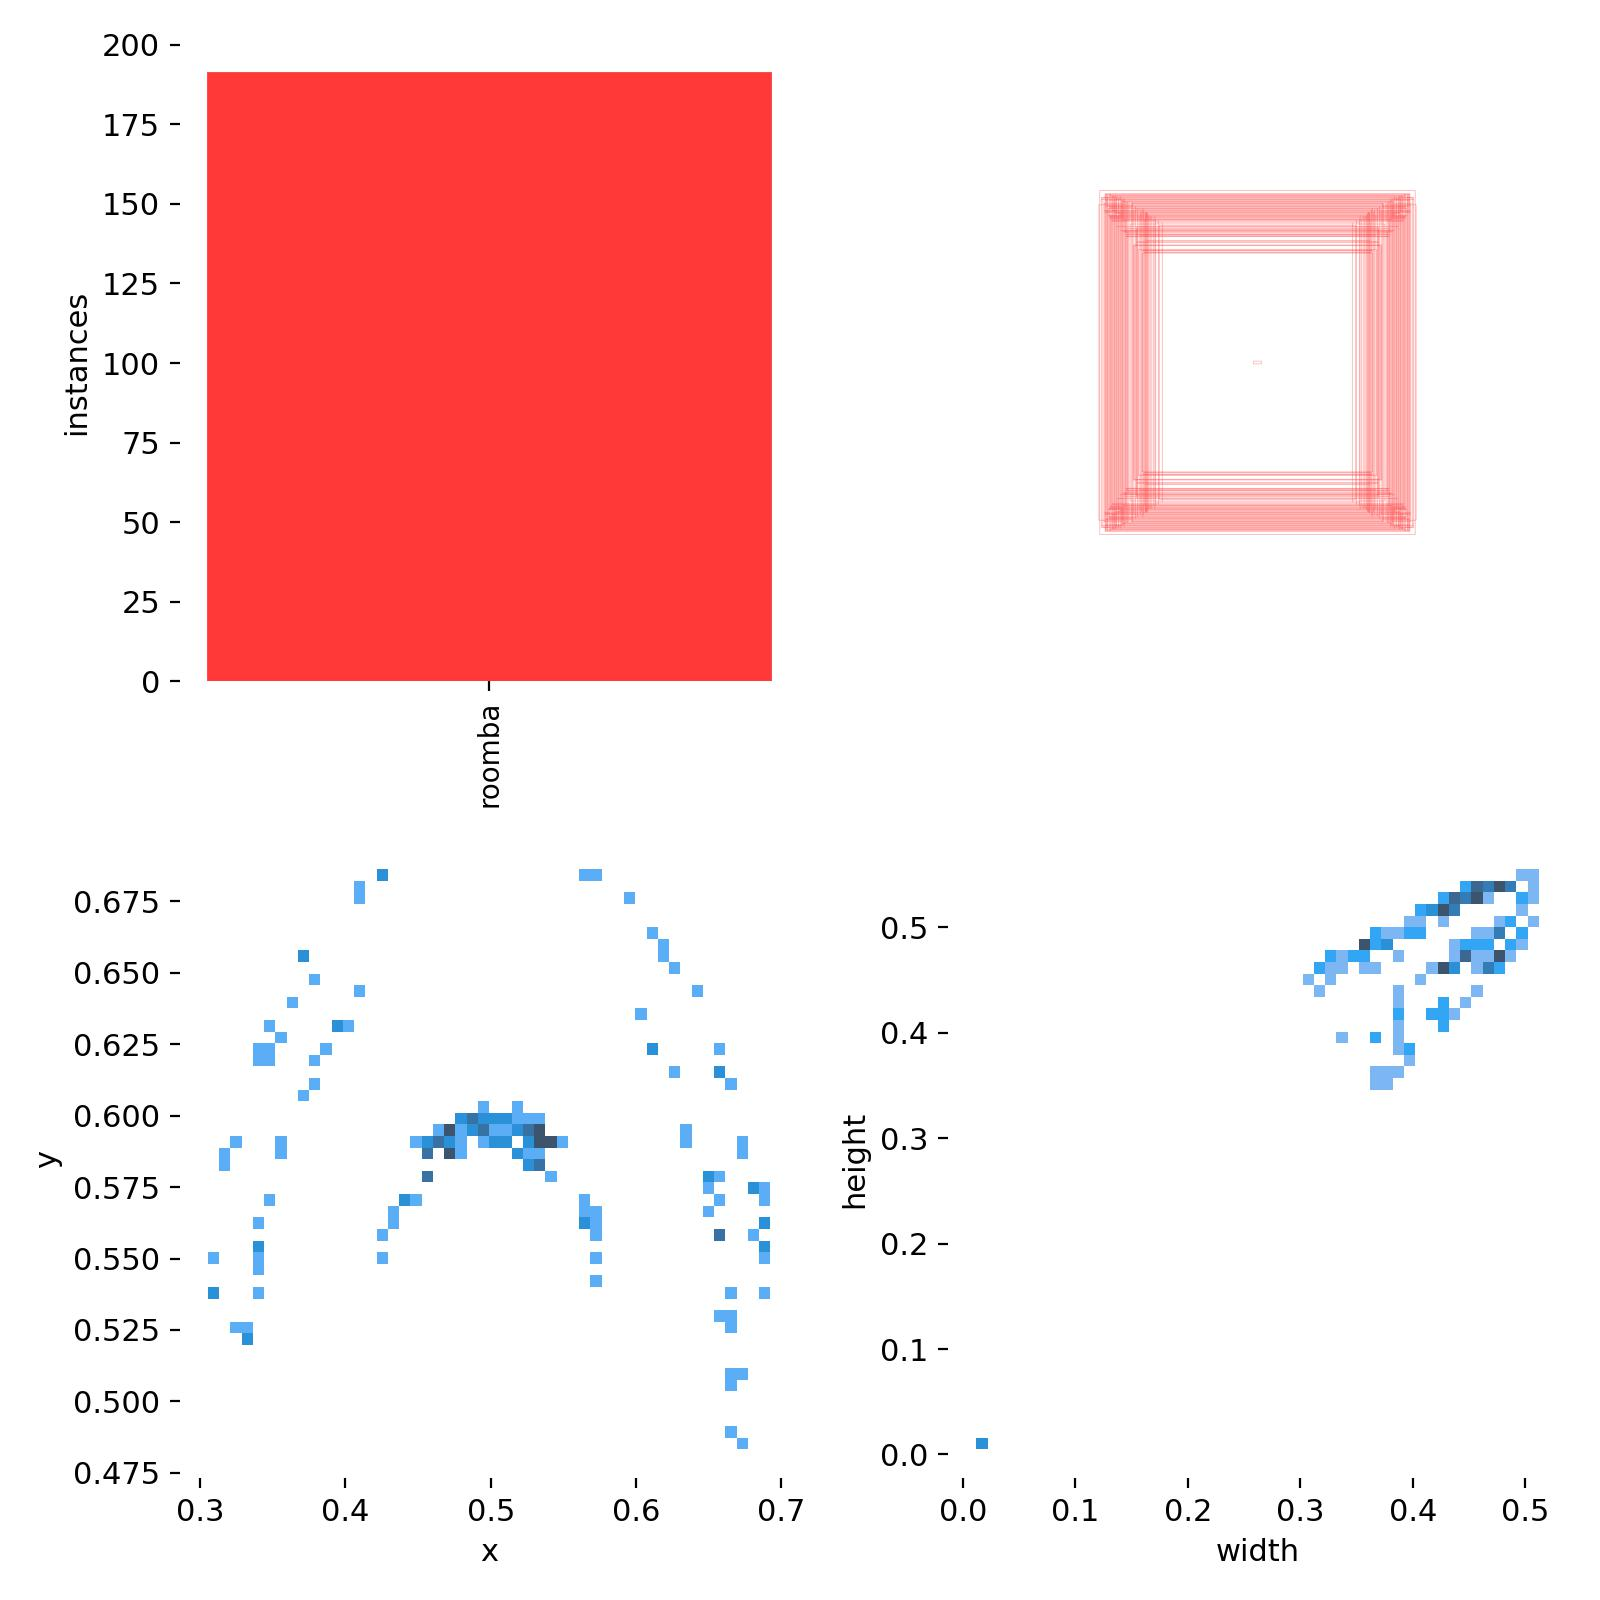

In [12]:
Image(filename=f'/content/yolov5/runs/train/exp/labels.jpg', width=600)

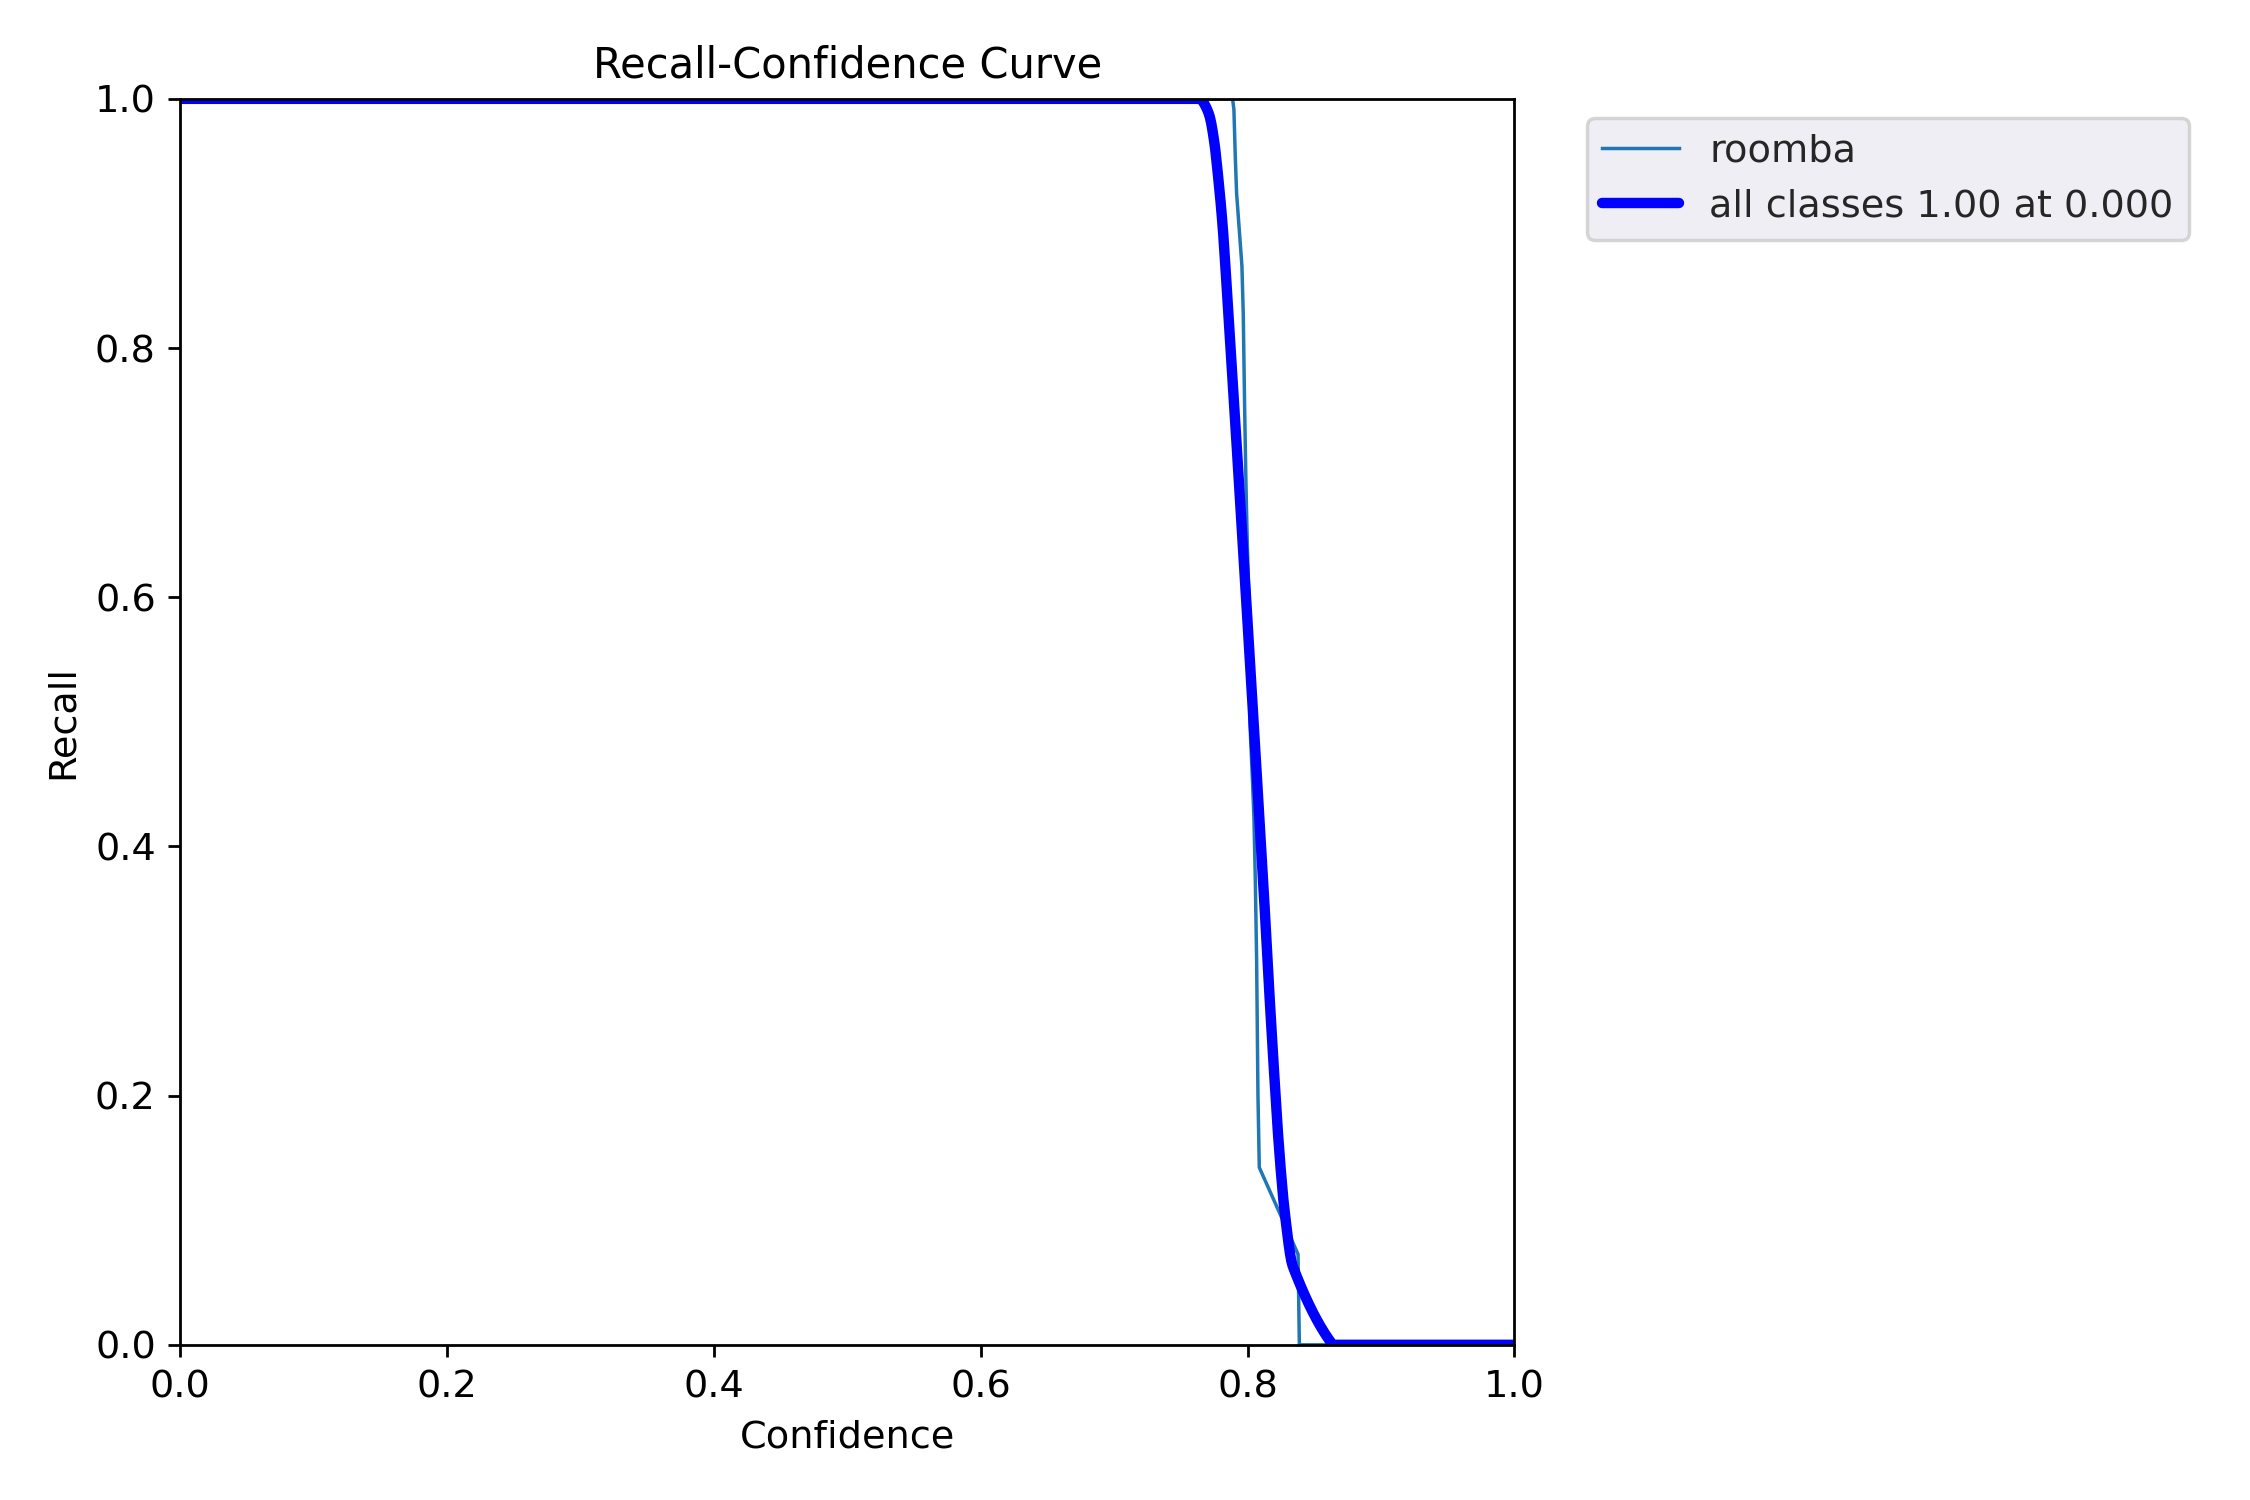

In [13]:
Image(filename=f'/content/yolov5/runs/train/exp/R_curve.png', width=600)

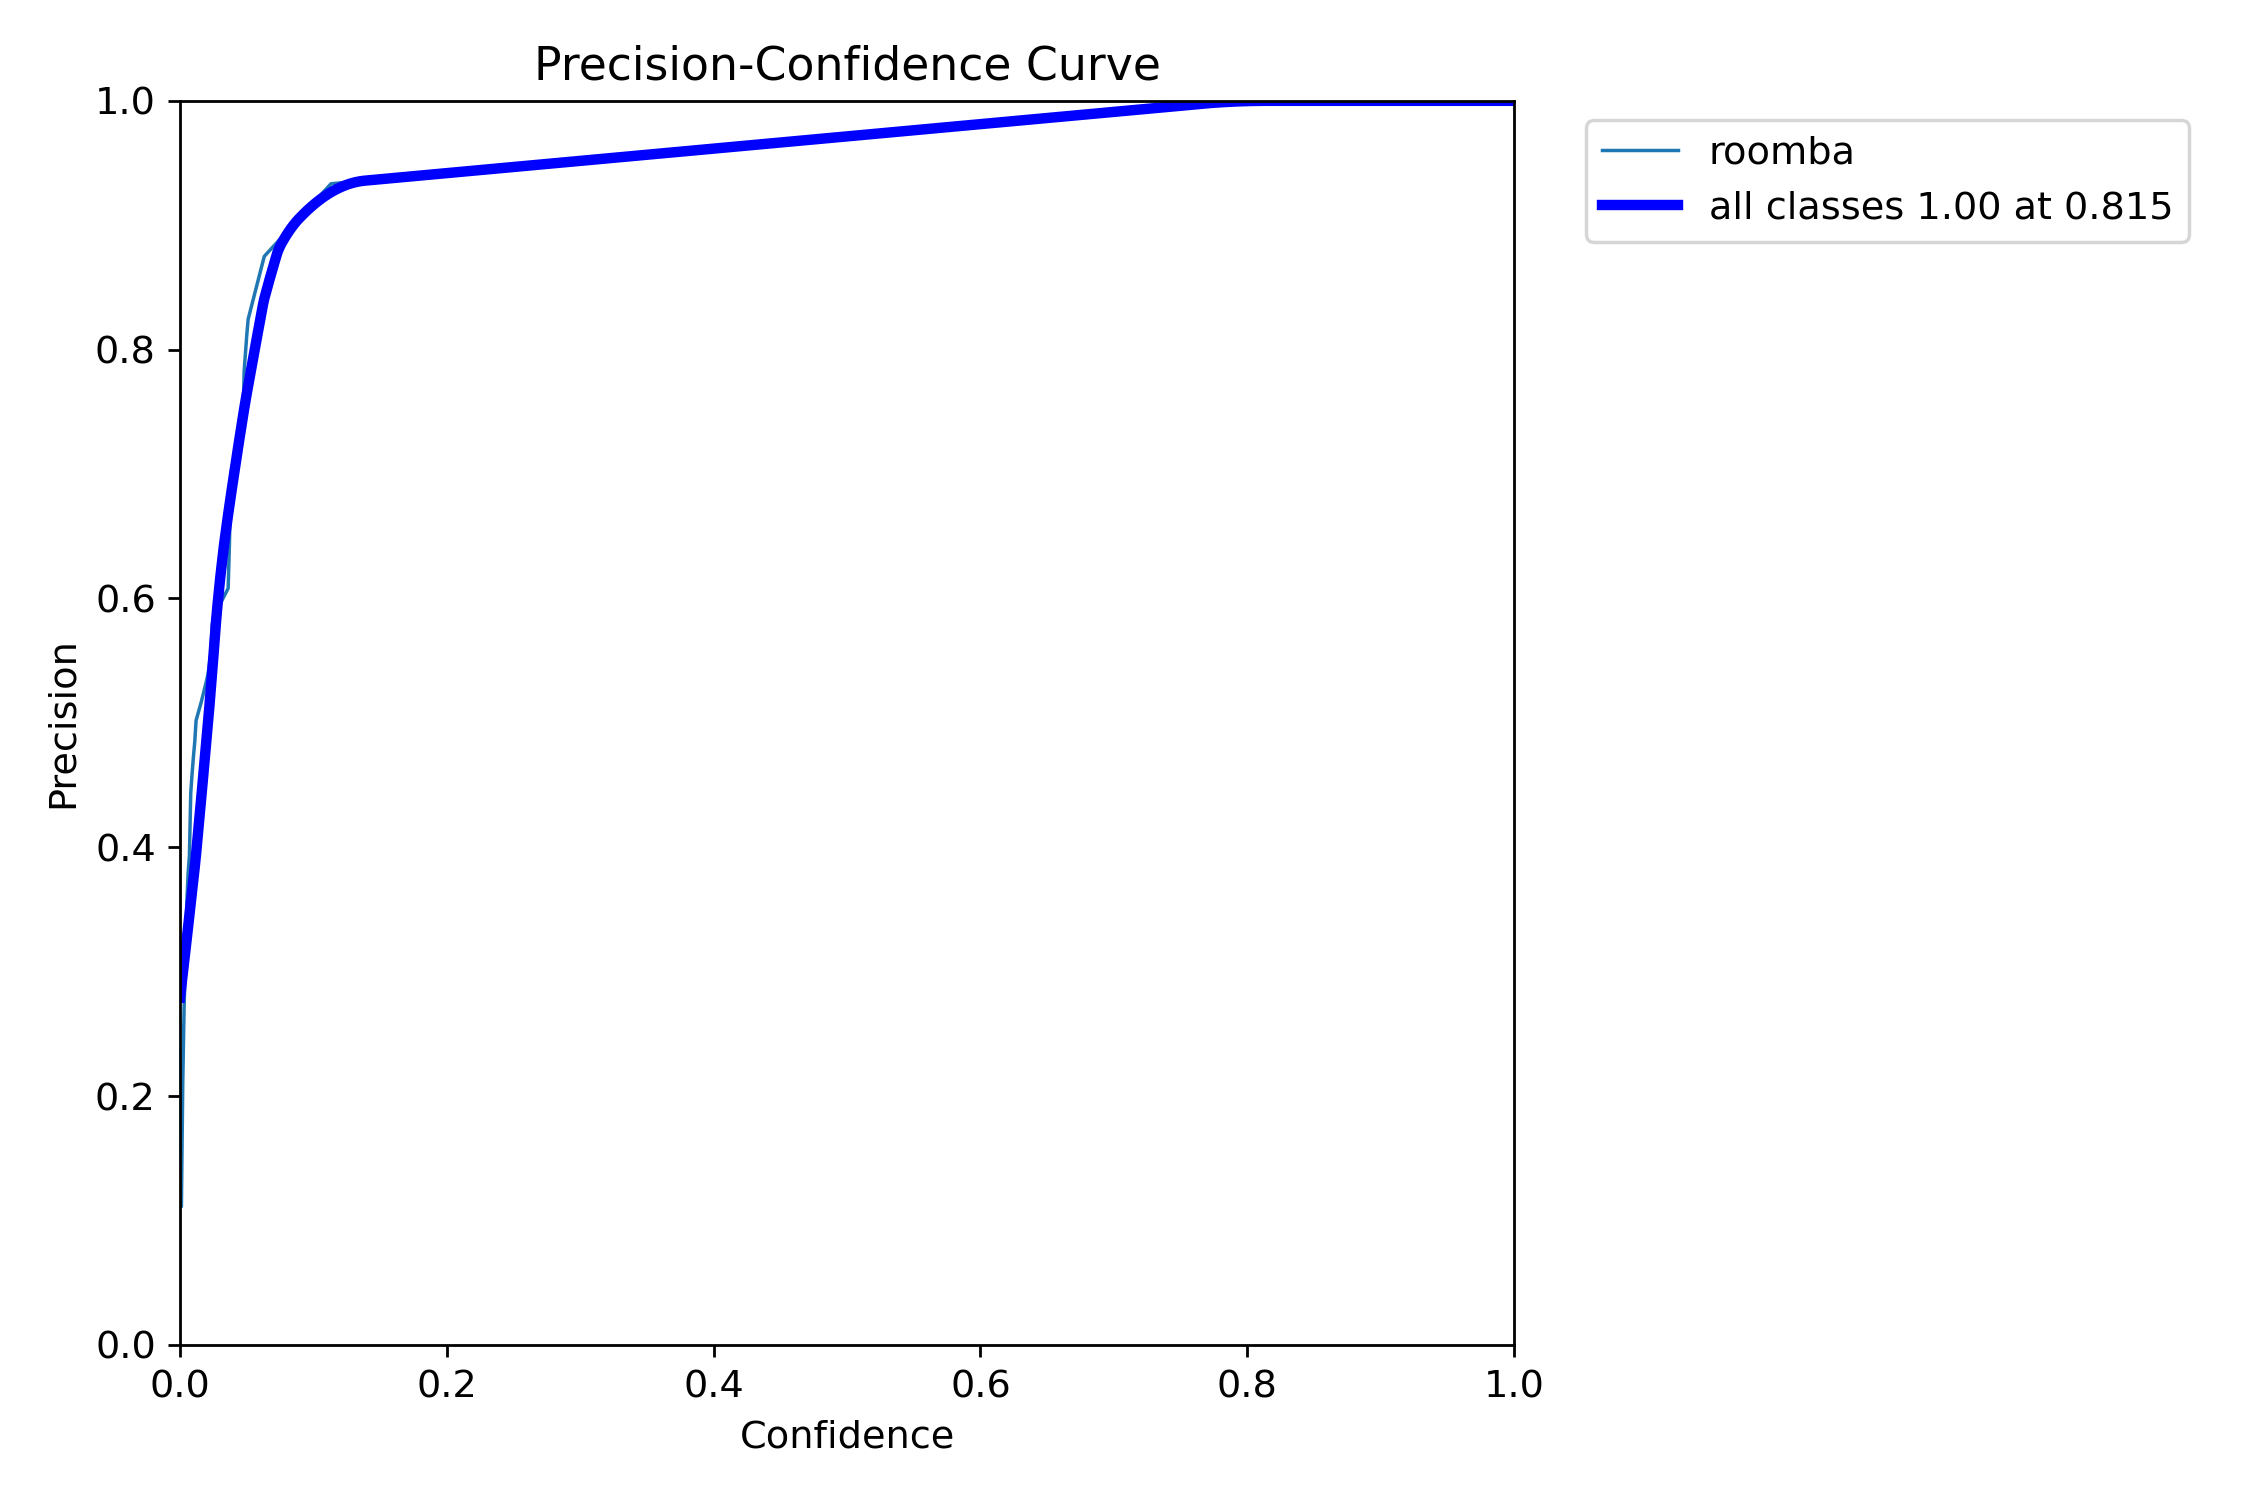

In [14]:
Image(filename=f'/content/yolov5/runs/train/exp/P_curve.png', width=600)

# Running the best model version against test images

In [15]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Thesis-Data-3/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/14 /content/datasets/Thesis-Data-3/valid/images/0_1914_1668876768-4637387_png.rf.6f1302d63305f2e36d1dafb75d173886.jpg: 416x416 1 roomba, 9.7ms
image 2/14 /content/datasets/Thesis-Data-3/valid/images/1000_1891_1668876802-6343_png.rf.59ba062f5ca100358fb041c0482870a8.jpg: 416x416 1 roomba, 9.3ms
image 3/14 /content/

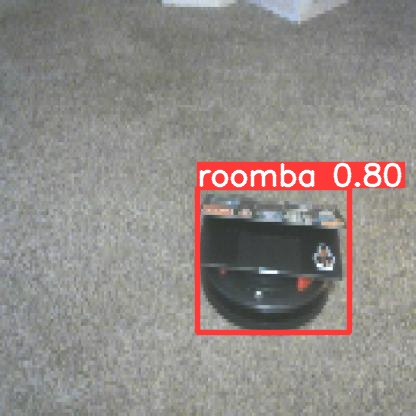

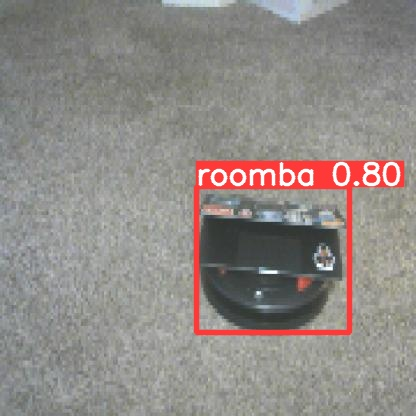

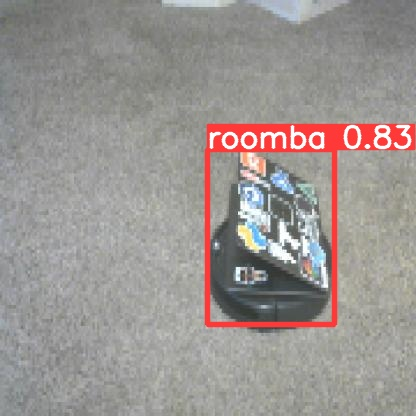

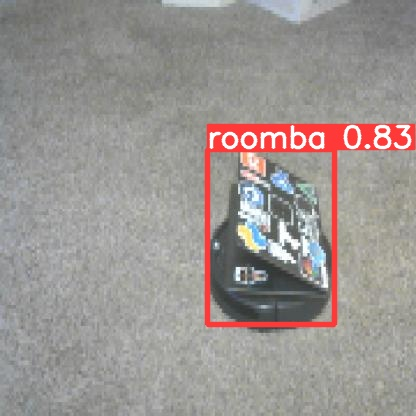

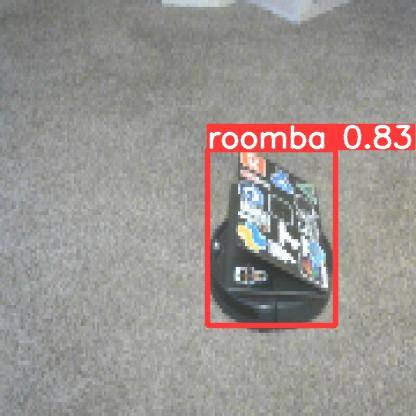

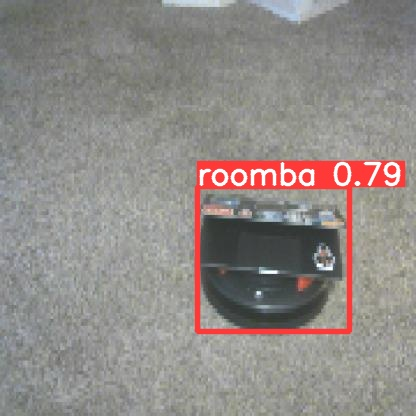

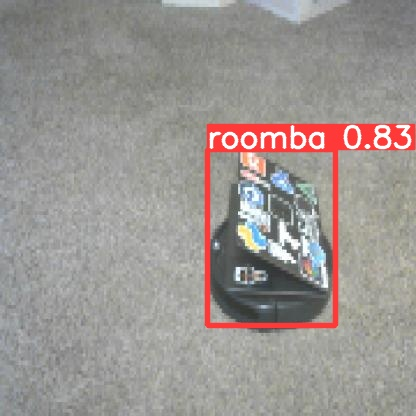

In [16]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
# Choose the correct exp folder - see prev output block
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg')[:7]:
    i += 1

    if i < 8:
      display(Image(filename=imageName))
      print("\n")

# Export Import Files from Training

In [18]:
from google.colab import files

files.download('/content/yolov5/runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# files.download('/content/yolov5/runs/detect/exp/0_1914_1668876768-4637387_png.rf.6f1302d63305f2e36d1dafb75d173886.jpg')
# files.download('/content/yolov5/runs/detect/exp/1000_1891_1668876802-6343_png.rf.59ba062f5ca100358fb041c0482870a8.jpg')
# files.download('/content/yolov5/runs/detect/exp/1000_2127_1668877907-3802836_png.rf.5234bf804feedb3af0ad70bae89fe7c9.jpg')
# files.download('/content/yolov5/runs/detect/exp/100_1486_1668877116-832912_png.rf.780172598adc96df9af43e0c1db1457f.jpg')
# files.download('/content/yolov5/runs/detect/exp/100_2169_1668877877-3656373_png.rf.361bddef16648c8b15eedc116178415a.jpg')
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
  print(imageName)
  files.download(imageName)

/content/yolov5/runs/detect/exp/1090_1449_1668877149-8744028_png.rf.0e8e7893747dc6019b83c849bfe29079.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/100_1486_1668877116-832912_png.rf.780172598adc96df9af43e0c1db1457f.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/1010_1880_1668876803-0011454_png.rf.11f2d3227451e35b882ff1714aec9464.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/1020_1882_1668876803-334244_png.rf.487900f6b394d44f50f174696ea51f05.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/0_1914_1668876768-4637387_png.rf.6f1302d63305f2e36d1dafb75d173886.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/1020_1446_1668877147-5104353_png.rf.5026a223c253d2efe97da85c064324c1.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/1040_1882_1668876804-0138075_png.rf.53e220150ce0c8492ce54b91c46b16d9.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/100_2169_1668877877-3656373_png.rf.361bddef16648c8b15eedc116178415a.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/1070_1891_1668876805-07531_png.rf.6ceb063004a61db3f05cf669a2959ec0.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/1070_2102_1668877568-9819217_png.rf.ff393294d60fb5666f2d8d437222fdbe.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/1030_1879_1668876803-674133_png.rf.8976ec74b19aa1bd185c3395ac8e66bb.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/1030_2133_1668877908-3971694_png.rf.d29dc733d799fb9425f39c180ee5e8d6.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/1000_2127_1668877907-3802836_png.rf.5234bf804feedb3af0ad70bae89fe7c9.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/1000_1891_1668876802-6343_png.rf.59ba062f5ca100358fb041c0482870a8.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
for imageName in glob.glob('/content/yolov5/runs/train/exp/*.png'):
  print(imageName)
  files.download(imageName)

/content/yolov5/runs/train/exp/F1_curve.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/train/exp/results.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/train/exp/PR_curve.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/train/exp/confusion_matrix.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/train/exp/R_curve.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/train/exp/P_curve.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>